#The goal of this project is to create a machine learning model capable of receiving text describing a clothing item and returning a ranked list of links to similar items from different websites. Your solution must be a function deployed on Google Cloud that accepts a text string and returns JSON responses with ranked suggestions.

#Importing necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from google.colab import files
uploaded= files.upload()

Saving amazon_co-ecommerce_sample.csv to amazon_co-ecommerce_sample (1).csv


In [44]:
data = pd.read_csv("amazon_co-ecommerce_sample.csv")

In [45]:
data

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop R

#EDA(Exploratory Data Analysis)

#To check Null values

In [46]:
data.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

#To check duplicates

In [47]:
data.duplicated().sum()

0

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [49]:
data.describe()

,number_of_answered_questions
count,9235.000000
mean,1.834976
std,2.517268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,39.000000


In [50]:
data.shape

(10000, 17)

#Data Visualization

In [51]:
len(data['manufacturer'].unique()) 

2652

<Figure size 1500x1000 with 0 Axes>

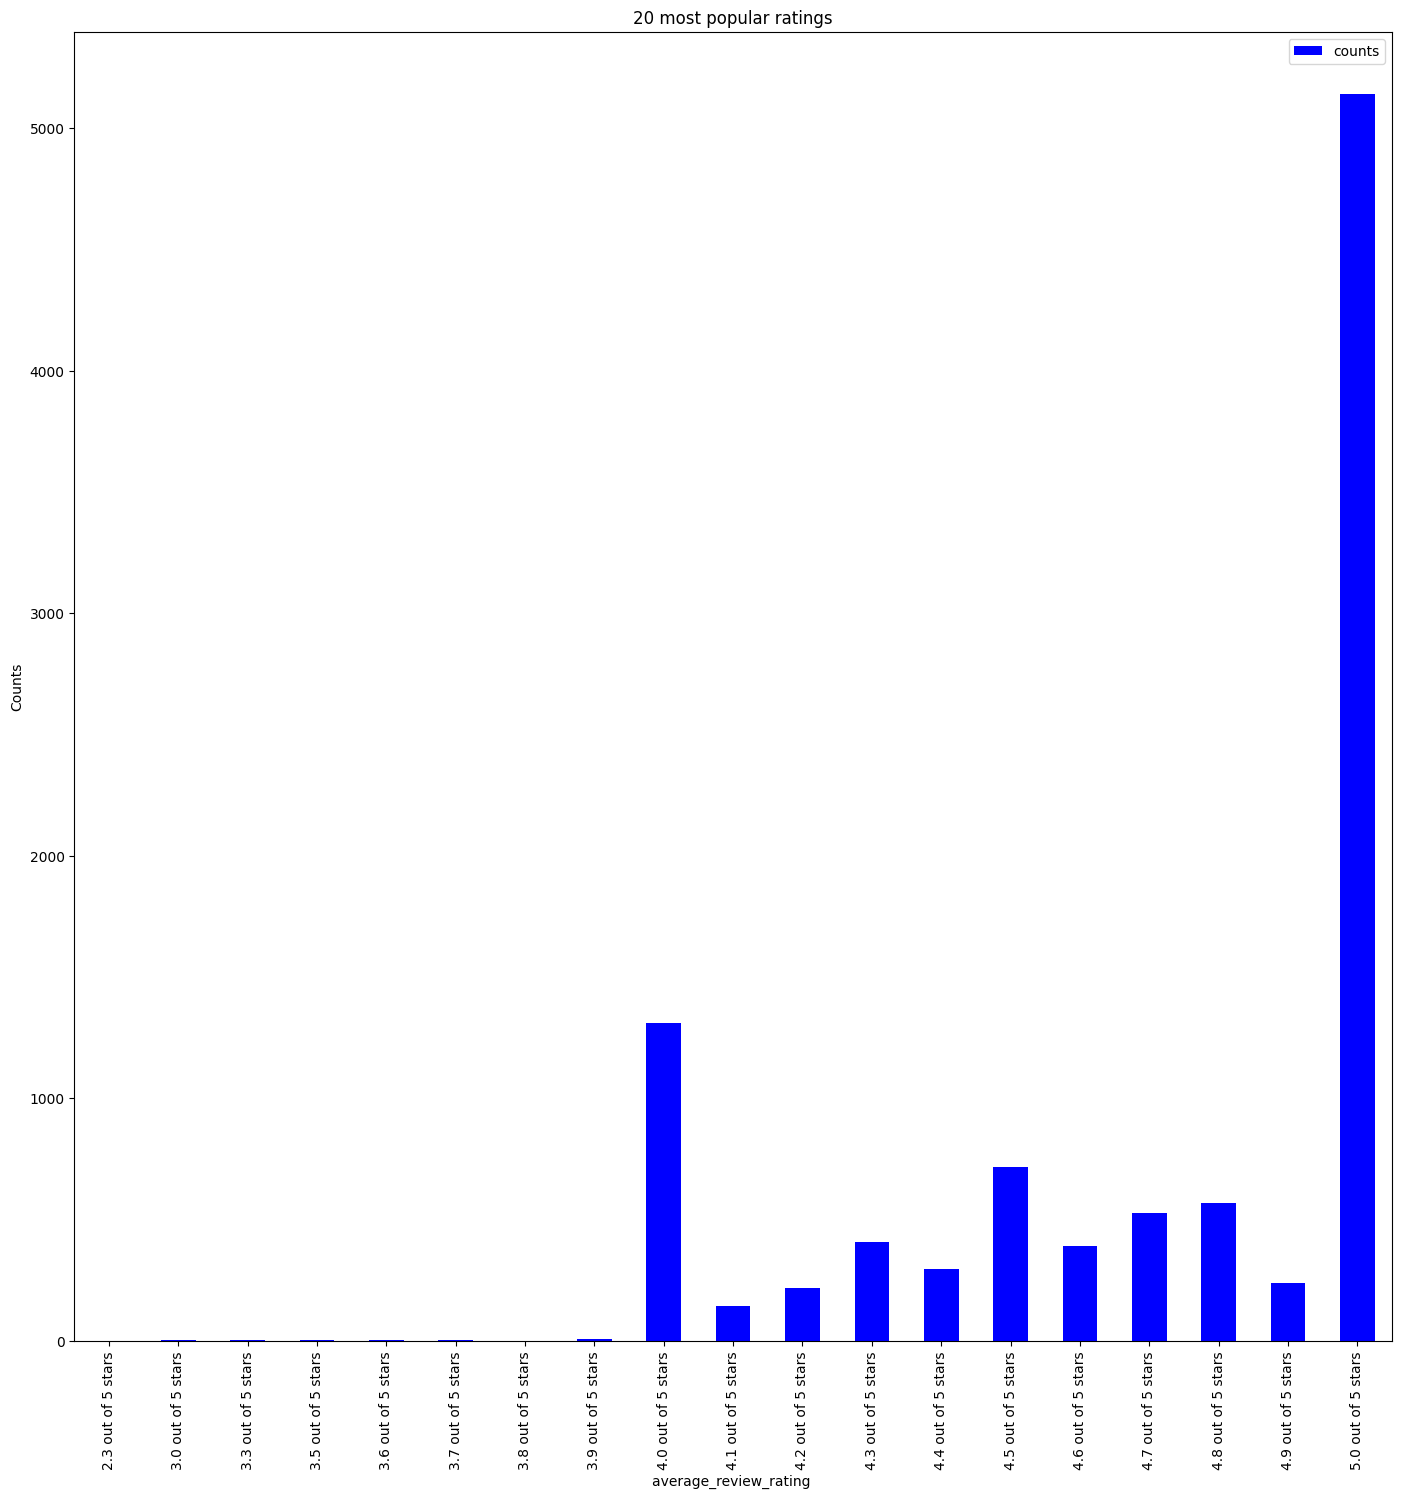

In [52]:
# Grouping the data by rating and count the frequency of each rating
average_review_rating_counts = data.groupby('average_review_rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = average_review_rating_counts.sort_values(by='counts',ascending=False)

# Plot a bar chart of the 20 most popular ratings
plt.figure(figsize=(15,10))
average_review_rating_counts[:20].plot.bar(x='average_review_rating',y='counts',color='blue')
plt.xlabel('average_review_rating ')
plt.ylabel('Counts')
plt.title('20 most popular ratings')
plt.show()

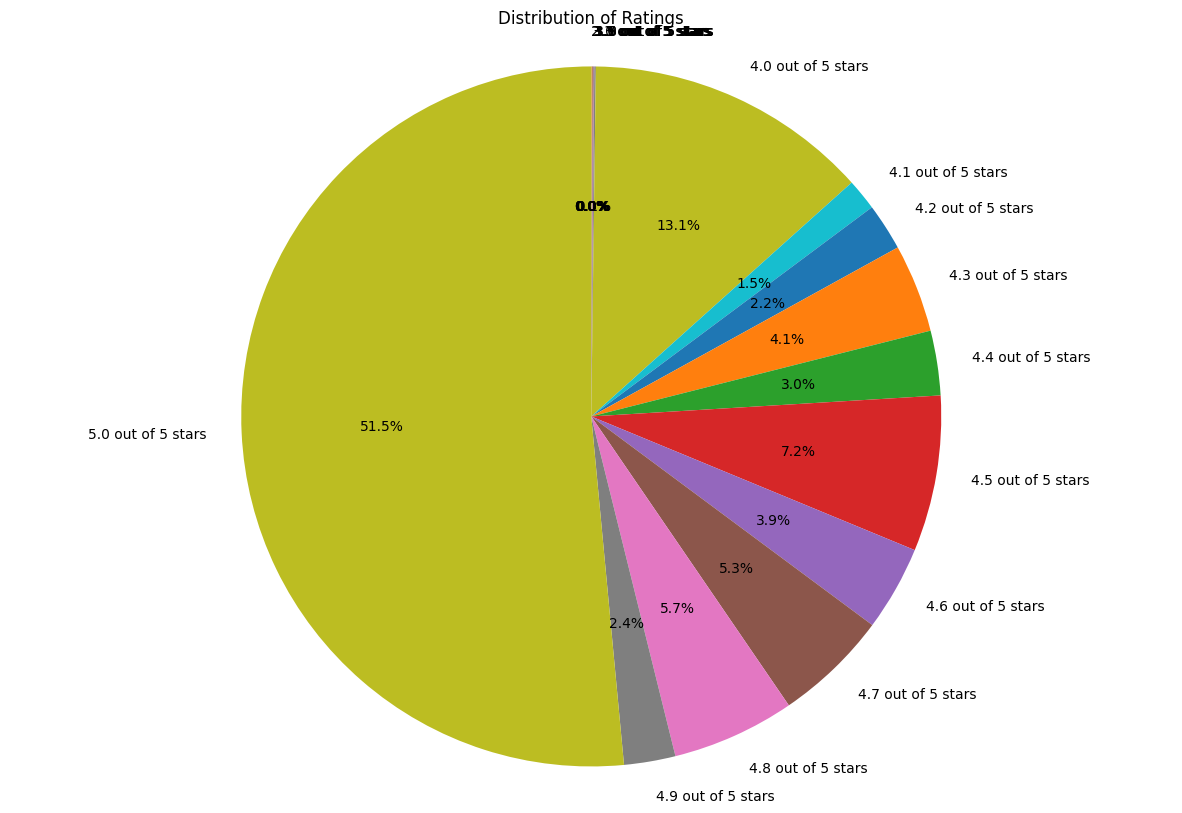

In [53]:
# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(average_review_rating_counts['counts'], labels=average_review_rating_counts['average_review_rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

In [54]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


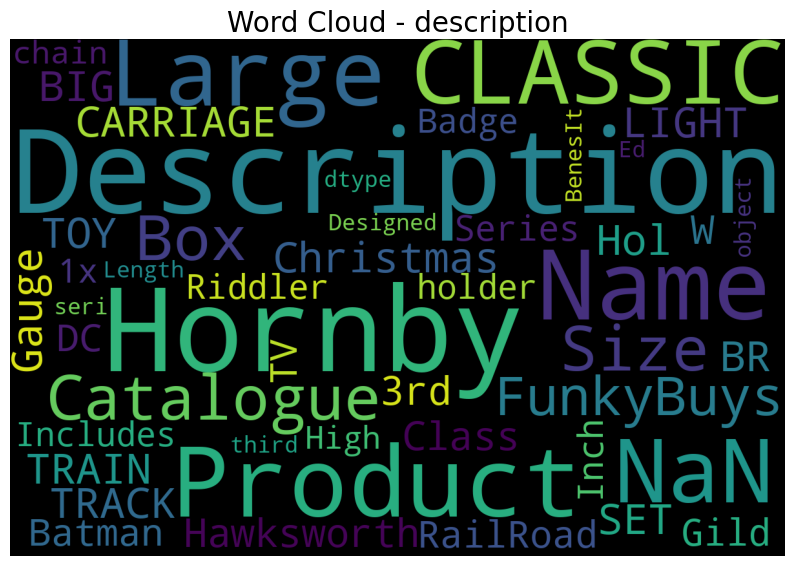

In [55]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['description']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud - description', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

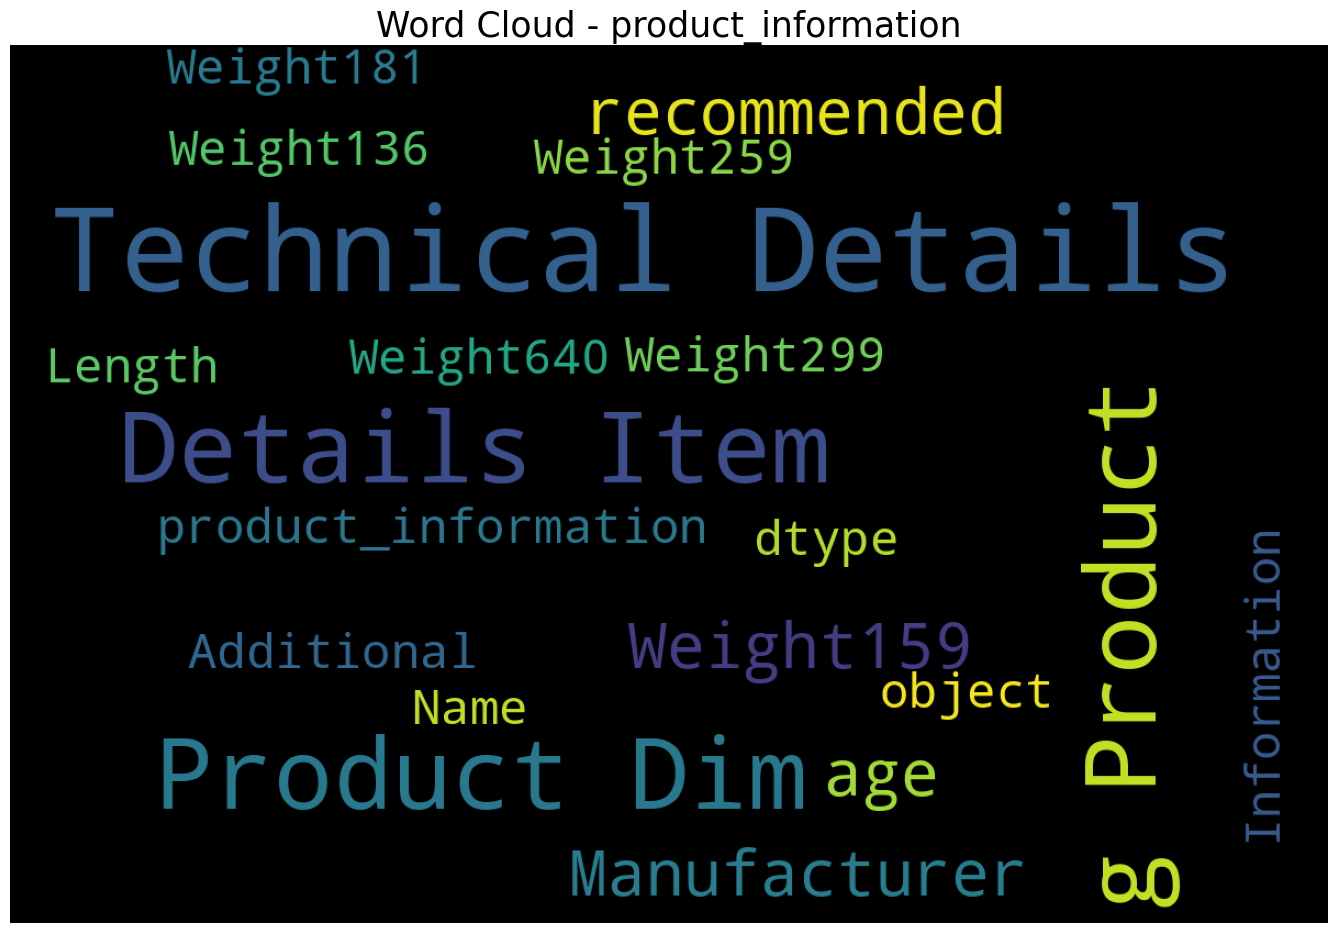

In [56]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['product_information']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - product_information', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#Data Preprocessing

In [57]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Data Cleaning 

#Converted to lowercase
#Removed Puntuations
#Tokenized the featured
#Removed stop words
#Joined the cleaned tokens back together

In [58]:
import nltk
import string
from nltk.corpus import stopwords

def cleaned_product_information(product_information):
    # Check if the input is a string
    if isinstance(product_information, str):
        # Convert to lowercase
        product_information = product_information.lower()

        # Remove punctuation
        product_information = product_information.translate(str.maketrans('', '', string.punctuation))

        # Tokenize the product information
        tokens = nltk.word_tokenize(product_information)

        # Remove stop words
        tokens = [word for word in tokens if word not in stopwords.words('english')]

        # Join the cleaned tokens back together
        cleaned_product_information = ' '.join(tokens)
    else:
        cleaned_product_information = ''

    return cleaned_product_information



In [59]:
data['product_information'] = data['product_information'].apply(cleaned_product_information)

In [60]:
import nltk
import string
from nltk.corpus import stopwords

def cleaned_product_description(product_description):
    # Check if the input is a string
    if isinstance(product_description, str):
        # Convert to lowercase
        product_description = product_description.lower()

        # Remove punctuation
        product_description = product_description.translate(str.maketrans('', '', string.punctuation))

        # Tokenize the product description
        tokens = nltk.word_tokenize(product_description)

        # Remove stop words
        tokens = [word for word in tokens if word not in stopwords.words('english')]

        # Join the cleaned tokens back together
        cleaned_product_description = ' '.join(tokens)
    else:
        cleaned_product_description = ''

    return cleaned_product_description










In [61]:
data['product_description'] = data['product_description'].apply(cleaned_product_description)

In [62]:

import nltk
import string
from nltk.corpus import stopwords

def cleaned_customer_reviews(customer_reviews):
    # Check if the input is a string
    if isinstance(customer_reviews, str):
        # Convert to lowercase
        customer_reviews = customer_reviews.lower()

        # Remove punctuation
        customer_reviews = customer_reviews.translate(str.maketrans('', '', string.punctuation))

        # Tokenize the customer review
        customer_reviews = nltk.word_tokenize(customer_reviews)

        # Remove stop words
        tokens = [word for word in customer_reviews if word not in stopwords.words('english')]

        # Join the cleaned tokens back together
        cleaned_customer_reviews = ' '.join(tokens)
    else:
        cleaned_customer_reviews = ''

    return cleaned_customer_reviews







In [63]:
data['customer_reviews'] = data['customer_reviews'].apply(cleaned_customer_reviews)

In [64]:

import nltk
import string
from nltk.corpus import stopwords

def cleaned_product_name(product_name):
    # Convert to lowercase
    product_name = product_name.lower()

    # Remove punctuation
    product_name = product_name.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the product name
    product_name = nltk.word_tokenize(product_name)

    # Remove stop words
    tokens = [word for word in product_name if word not in stopwords.words('english')]

    # Join the cleaned tokens back together
    cleaned_product_name = ' '.join(tokens)

    return cleaned_product_name




In [65]:
data['product_name'] = data['product_name'].apply(cleaned_product_name)

#Dropping Unnecessary Features

In [66]:
data_clean = data.drop(["uniq_id", "description","sellers","customer_questions_and_answers"], axis=1)

In [67]:
data_clean

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews
0,hornby 2014 catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,technical details item weight640 g product dim...,product description hornby 2014 catalogue box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,worth buying pictures alone ever 40 6 april 20...
1,funkybuys® large christmas holiday express fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,technical details manufacturer recommended age...,size namelarge funkybuys® large christmas holi...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,four stars 40 18 dec 2015 kenneth bell 18 dec ...
2,classic toy train set track carriages light en...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,technical details manufacturer recommended age...,big classic toy train set track carriage light...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,highly recommended 50 26 may 2015 simonb 26 ma...
3,hornby coach r4410a br hawksworth corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,technical details item weight259 g product dim...,hornby 00 gauge br hawksworth 3rd class w 2107...,NaN,love 50 22 july 2013 lilla lukacs 22 july 2013...
4,hornby 00 gauge 040 gildenlow salt co steam lo...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,technical details item weight159 g product dim...,product description hornby railroad 040 gilden...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,birthday present 50 14 april 2014 love dog 14 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,batman 1966 tv series action figures riddler,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,technical details item weight136 g product dim...,dc 66 batman classic tv series 6 inch riddler ...,NaN,realistic 50 31 mar 2014 ray 31 mar 2014 true ...
9996,star wars costume kids stormtrooper costume st...,Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,technical details additional information asinb...,,http://www.amazon.co.uk/Storm-Trooper-Costume-...,see grandson us going fun 40 9 dec 2014 janet ...
9997,defiance lawkeeper metal badge prop replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,technical details item weight159 g product dim...,includes 1x badge holder chain high quality me...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,five stars 50 18 dec 2015 amazon customer 18 d...
9998,justice league america series 3 green lantern ...,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,NaN,technical details item weight181 g product dim...,designed ed benesits third series based popula...,NaN,best sculpt 50 13 may 2010 sodam yat 13 may 20...


In [68]:
data_clean["price"].value_counts()

£9.99      189
£4.99      140
£14.99     132
£5.99      126
£6.99      126
          ... 
£41.00       1
£124.95      1
£82.02       1
£37.73       1
£21.20       1
Name: price, Length: 2625, dtype: int64

In [69]:
#Converting  text to vector form

#Converting features in text form to vector form using TF-IDF Vectorizer

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report,mean_squared_error

In [71]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
customer_reviews = vectorizer.fit_transform(data_clean["customer_reviews"])

In [72]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
product_description = vectorizer.fit_transform(data_clean["product_description"])

In [73]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
product_information = vectorizer.fit_transform(data_clean["product_information"])

In [74]:
from sklearn.preprocessing import MinMaxScaler
datatypes=['int16','int32','int64','float16','float32','float64']
normalization = data_clean.select_dtypes(include=datatypes)
for col in normalization.columns: 
  MinMaxScaler(col)

In [75]:
from sklearn.cluster import KMeans

In [76]:
data1_cleaned = data_clean.drop(["product_name","manufacturer","amazon_category_and_sub_category","number_available_in_stock"],axis=1)


In [77]:
data1_cleaned

,price,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews
0,£3.42,15,1.0,4.9 out of 5 stars,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,technical details item weight640 g product dim...,product description hornby 2014 catalogue box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,worth buying pictures alone ever 40 6 april 20...
1,£16.99,2,1.0,4.5 out of 5 stars,http://www.amazon.co.uk/Christmas-Holiday-Expr...,technical details manufacturer recommended age...,size namelarge funkybuys® large christmas holi...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,four stars 40 18 dec 2015 kenneth bell 18 dec ...
2,£9.99,17,2.0,3.9 out of 5 stars,http://www.amazon.co.uk/Classic-Train-Lights-B...,technical details manufacturer recommended age...,big classic toy train set track carriage light...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,highly recommended 50 26 may 2015 simonb 26 ma...
3,£39.99,1,2.0,5.0 out of 5 stars,NaN,technical details item weight259 g product dim...,hornby 00 gauge br hawksworth 3rd class w 2107...,NaN,love 50 22 july 2013 lilla lukacs 22 july 2013...
4,£32.19,3,2.0,4.7 out of 5 stars,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,technical details item weight159 g product dim...,product description hornby railroad 040 gilden...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,birthday present 50 14 april 2014 love dog 14 ...
...,...,...,...,...,...,...,...,...,...
9995,£22.95,3,3.0,5.0 out of 5 stars,http://www.amazon.co.uk/Batman-1966-Series-Act...,technical details item weight136 g product dim...,dc 66 batman classic tv series 6 inch riddler ...,NaN,realistic 50 31 mar 2014 ray 31 mar 2014 true ...
9996,£39.99,1,3.0,4.0 out of 5 stars,http://www.amazon.co.uk/Storm-Trooper-Costume-...,technical details additional information asinb...,,http://www.amazon.co.uk/Storm-Trooper-Costume-...,see grandson us going fun 40 9 dec 2014 janet ...
9997,£43.99,1,3.0,5.0 out of 5 stars,NaN,technical details item weight159 g product dim...,includes 1x badge holder chain high quality me...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,five stars 50 18 dec 2015 amazon customer 18 d...
9998,£49.81,1,3.0,5.0 out of 5 stars,NaN,technical details item weight181 g product dim...,designed ed benesits third series based popula...,NaN,best sculpt 50 13 may 2010 sodam yat 13 may 20...


In [78]:
data1_cleaned['average_review_rating'] = data1_cleaned['average_review_rating'].str.split(' out of 5 stars').str[0]


In [79]:
data1_cleaned['price'] = data1_cleaned['price'].str.replace('£', '')


In [80]:
data1_cleaned

,price,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews
0,3.42,15,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,technical details item weight640 g product dim...,product description hornby 2014 catalogue box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,worth buying pictures alone ever 40 6 april 20...
1,16.99,2,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,technical details manufacturer recommended age...,size namelarge funkybuys® large christmas holi...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,four stars 40 18 dec 2015 kenneth bell 18 dec ...
2,9.99,17,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,technical details manufacturer recommended age...,big classic toy train set track carriage light...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,highly recommended 50 26 may 2015 simonb 26 ma...
3,39.99,1,2.0,5.0,NaN,technical details item weight259 g product dim...,hornby 00 gauge br hawksworth 3rd class w 2107...,NaN,love 50 22 july 2013 lilla lukacs 22 july 2013...
4,32.19,3,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,technical details item weight159 g product dim...,product description hornby railroad 040 gilden...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,birthday present 50 14 april 2014 love dog 14 ...
...,...,...,...,...,...,...,...,...,...
9995,22.95,3,3.0,5.0,http://www.amazon.co.uk/Batman-1966-Series-Act...,technical details item weight136 g product dim...,dc 66 batman classic tv series 6 inch riddler ...,NaN,realistic 50 31 mar 2014 ray 31 mar 2014 true ...
9996,39.99,1,3.0,4.0,http://www.amazon.co.uk/Storm-Trooper-Costume-...,technical details additional information asinb...,,http://www.amazon.co.uk/Storm-Trooper-Costume-...,see grandson us going fun 40 9 dec 2014 janet ...
9997,43.99,1,3.0,5.0,NaN,technical details item weight159 g product dim...,includes 1x badge holder chain high quality me...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,five stars 50 18 dec 2015 amazon customer 18 d...
9998,49.81,1,3.0,5.0,NaN,technical details item weight181 g product dim...,designed ed benesits third series based popula...,NaN,best sculpt 50 13 may 2010 sodam yat 13 may 20...


In [81]:
data1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   price                                        8565 non-null   object 
 1   number_of_reviews                            9982 non-null   object 
 2   number_of_answered_questions                 9235 non-null   float64
 3   average_review_rating                        9982 non-null   object 
 4   customers_who_bought_this_item_also_bought   8938 non-null   object 
 5   product_information                          10000 non-null  object 
 6   product_description                          10000 non-null  object 
 7   items_customers_buy_after_viewing_this_item  6935 non-null   object 
 8   customer_reviews                             10000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 703.2+ KB
